In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import itertools

In [71]:
df1=pd.read_csv('Data01.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df1.shape

(200, 5)

In [73]:
df1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [74]:
df1['Gender']=df1['Gender'].replace({'Male':1,'Female':0})

In [75]:
df1=df1.set_index('CustomerID')

In [76]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


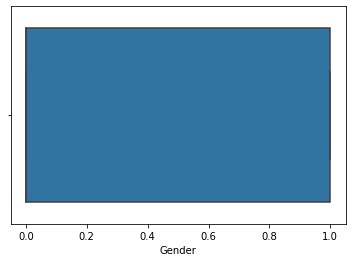

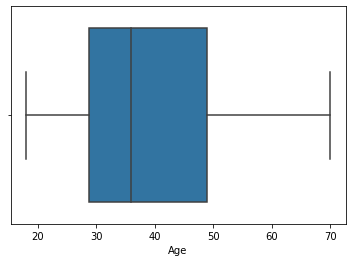

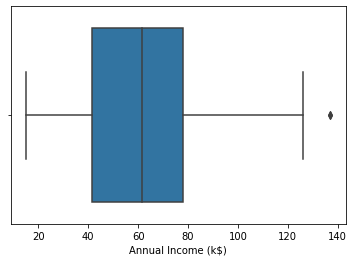

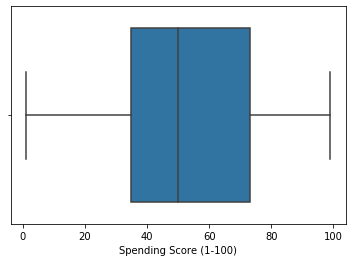

In [77]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

In [78]:
y=df1['Spending Score (1-100)']
x=df1.drop('Spending Score (1-100)',axis=1)


In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xn=ss.fit_transform(x)
dfn=df(xn,columns=x.columns)
dfn

,Gender,Age,Annual Income (k$)
0,1.128152,-1.424569,-1.738999
1,1.128152,-1.281035,-1.738999
2,-0.886405,-1.352802,-1.700830
3,-0.886405,-1.137502,-1.700830
4,-0.886405,-0.563369,-1.662660
...,...,...,...
195,-0.886405,-0.276302,2.268791
196,-0.886405,0.441365,2.497807
197,1.128152,-0.491602,2.497807
198,1.128152,-0.491602,2.917671


In [86]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

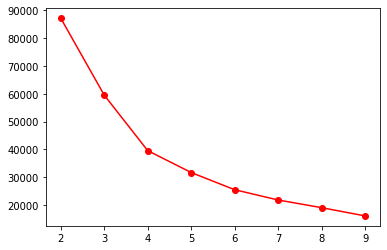

In [87]:
ssd=[]
ssc=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)
    labels=kmeans.labels_
    ssc.append(silhouette_score(x,labels))
plt.plot(range(2,10),ssd,color='r',marker='o')
plt.show()

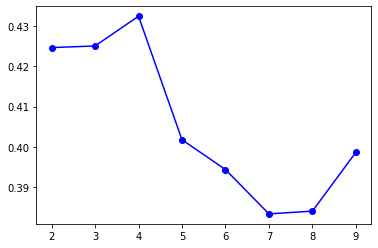

In [88]:
plt.plot(range(2,10),ssc,color='b',marker='o')
plt.show()

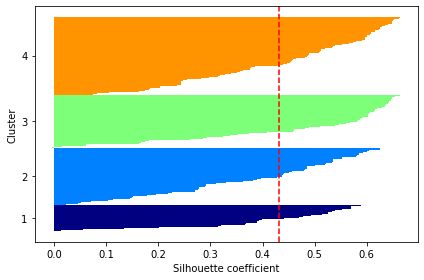

In [89]:
pm.svisualizer(x,4)

Elbow Analysis :- The above figure illustrates Elbow analysis. It shows that there is a distinct elbow formed at 4 clusters. This indicates that a 4 cluster solution is best for this data.